In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

# minimize: x^2 + y^2 + z^4  
#-100 < x,y,z <100

w = 1
w_damp = 0.995
c1 = 1.5
c2 = 1.5

lower_bound = np.array([-100, -100, -100])
upper_bound = np.array([100, 100, 100])

vel_max = 0.1 * (upper_bound-lower_bound)

class Particle:
    def __init__(self):
        self.dvar = np.random.random(3)*200 -100
        self.velocity = np.random.random(3)*200 -100
        self.personal_best = None
        self.fitness = None
        
    def calc_fitness(self):
        self.fitness = pow(self.dvar[0],2) + pow(self.dvar[1],2) + pow(self.dvar[2],2)

In [13]:
p1 = Particle()
p1.calc_fitness()
print(p1.dvar)
print(p1.fitness)

[-36.8193492   57.45382258  -1.75841964]
4659.698245025028


In [14]:
pop_size = 20
population = []
best_fit = math.inf
global_best = Particle()

for i in range(pop_size):
    population.append(Particle())
    population[i].calc_fitness()
    population[i].personal_best = Particle()
    population[i].personal_best.calc_fitness()
    if (population[i].fitness < best_fit):
        best_fit = population[i].fitness
        global_best = population[i]

print(best_fit)
print(global_best.dvar)

3557.3682958079703
[-41.06061684  43.04190696   4.33454561]


In [15]:
best = []
for it in range(50):
    # update position
    for i in range(pop_size):
        # population[i].dvar += population[i].velocity
        #update velocity
        population[i].velocity = w*population[i].velocity + c1*np.random.rand(3)*(population[i].personal_best.dvar - population[i].dvar) + c2*np.random.rand(3)*(global_best.dvar-population[i].dvar)
        #update velocity bound
        population[i].velocity = np.maximum(population[i].velocity, -vel_max)
        population[i].velocity = np.minimum(population[i].velocity, vel_max)
        #update dvar
        population[i].dvar += population[i].velocity
        # update dvar bound
        population[i].dvar = np.maximum(population[i].dvar, lower_bound)
        population[i].dvar = np.minimum(population[i].dvar, upper_bound)      
        # calc_fitness
        population[i].calc_fitness()  
        #update personal best
        if population[i].fitness < population[i].personal_best.fitness:
            population[i].personal_best = population[i]
        # update global best
        if population[i].fitness < global_best.fitness:
            global_best = population[i]
        #damp w
        w = w * w_damp
    print(global_best.dvar, " - ", global_best.fitness)
    best.append(global_best.fitness)


[ 18.63802127  21.78679852 -16.18027926]  -  1083.8418633876618
[ 2.92445845  6.0732357  -0.46671645]  -  45.65447335636327
[-7.17325933 -4.02448207  9.63100133]  -  160.40829192619955
[-0.48236394  4.12998298 -0.5648536 ]  -  17.60849394074568
[-1.3923982  -4.92714463  3.78133243]  -  40.51400187278892
[-0.71629911 -0.26658627  0.00867686]  -  0.5842279478416491
[0.59762957 0.3176724  0.30854999]  -  0.5532799580183979
[-1.58574993 -1.01248697  2.16978459]  -  8.24769787610954
[-0.40921157 -0.89518787  0.96566548]  -  1.9013252544871997
[-0.42451055 -0.45077274  0.22816257]  -  0.4354634357159606
[-0.02942925 -0.16370652 -0.08061822]  -  0.03416520252630195
[-0.06459219 -0.02903928 -0.15042118]  -  0.027641960696501017
[-0.02768695  0.01657407 -0.00299514]  -  0.0010502379182910802
[-0.02878834  0.02477447  0.00680385]  -  0.0014888347464038429
[-0.00325741  0.02228109  0.01208102]  -  0.0006530089161136434
[0.00142383 0.01897706 0.00232001]  -  0.0003675383874663243
[-0.00229574  0.0

(0.0, 50.0)

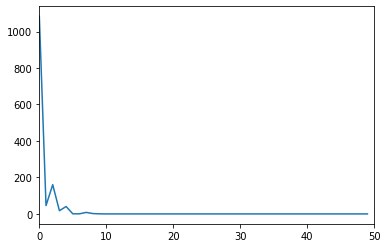

In [16]:
plt.plot(best)
plt.xlim((0, 50))

In [17]:
a = np.arange(0,5)
b = np.arange(3,8)

np.maximum(a,b)

array([3, 4, 5, 6, 7])